### Business Decision 
Objective: Build a predictive model to identify defaulters i.e high risk

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
raw_df = pd.read_excel('ClassifyRisk.xlsx')

In [3]:
raw_df.head()

,mortgage,loans,age,marital_status,income,risk
0,y,3,34,other,28061,1
1,n,2,37,other,28009,1
2,n,2,29,other,27615,1
3,y,2,33,other,27287,1
4,y,2,39,other,26954,1


In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   mortgage        246 non-null    object
 1   loans           246 non-null    int64 
 2   age             246 non-null    int64 
 3   marital_status  246 non-null    object
 4   income          246 non-null    int64 
 5   risk            246 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 11.7+ KB


In [5]:
raw_df.describe()

,loans,age,income,risk
count,246.000000,246.000000,246.000000,246.000000
mean,1.308943,40.642276,38789.593496,0.500000
std,0.843995,10.897017,13882.715928,0.501019
min,0.000000,17.000000,15301.000000,0.000000
25%,1.000000,32.000000,26881.250000,0.000000
50%,1.000000,41.000000,37662.500000,0.500000
75%,2.000000,50.000000,49398.500000,1.000000
max,3.000000,66.000000,78399.000000,1.000000


In [6]:
### Identify the Class Label or Y variable

Y = raw_df.risk.astype('category')
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 246 entries, 0 to 245
Series name: risk
Non-Null Count  Dtype   
--------------  -----   
246 non-null    category
dtypes: category(1)
memory usage: 502.0 bytes


In [7]:
### Select the Predictor Variables into a list called X_features

X_features = list(raw_df.columns)
X_features.remove('risk')
X_features

['mortgage', 'loans', 'age', 'marital_status', 'income']

In [8]:
X = raw_df[X_features]

In [10]:
### Split data into Training(0.7) and Testing(0.3)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size =0.3,random_state=500)
y_train.info

<bound method Series.info of 70     1
162    0
163    0
236    0
1      1
      ..
206    0
17     1
65     1
183    0
90     1
Name: risk, Length: 172, dtype: category
Categories (2, int64): [0, 1]>

In [11]:
### Pre-process X-vars
## 1. Identify  and dummy code (one-hot encoding) the categorical column

categorical_columns = ['mortgage','marital_status']
X_train_encoded=pd.get_dummies(X_train, columns=categorical_columns, drop_first =True, dtype = int)
X_test_encoded=pd.get_dummies(X_test, columns=categorical_columns, drop_first =True, dtype = int)

In [12]:
X_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172 entries, 70 to 90
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   loans                  172 non-null    int64
 1   age                    172 non-null    int64
 2   income                 172 non-null    int64
 3   mortgage_y             172 non-null    int32
 4   marital_status_other   172 non-null    int32
 5   marital_status_single  172 non-null    int32
dtypes: int32(3), int64(3)
memory usage: 7.4 KB


In [13]:
X_train_encoded.head()

,loans,age,income,mortgage_y,marital_status_other,marital_status_single
70,2,25,23580,1,1,0
162,1,66,42120,0,0,0
163,1,56,51684,1,0,0
236,0,44,50793,1,0,0
1,2,37,28009,0,1,0


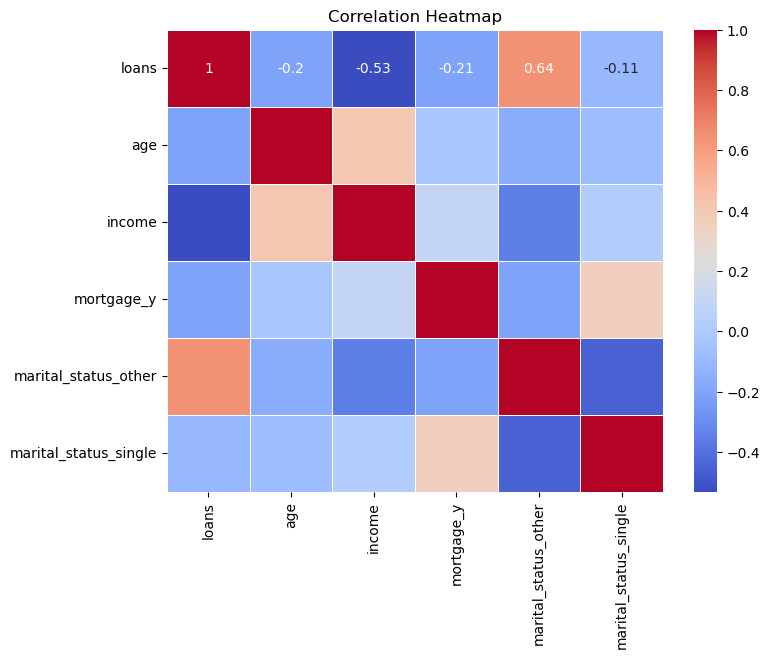

In [13]:
### 2. Identify and remove highly correlated columns
corr_matrix = X_train_encoded.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm', linewidth=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [14]:
#pip install statsmodels

In [15]:
#build the logit model

import statsmodels.api as sm
X_train_encoded = sm.add_constant(X_train_encoded)
logit = sm.Logit(y_train, X_train_encoded)
logit_model = logit.fit()
logit_model.summary2()

Optimization terminated successfully.
         Current function value: 0.152237
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Method:            MLE       
Dependent Variable:   risk              Pseudo R-squared:  0.780     
Date:                 2024-09-23 09:13  AIC:               66.3695   
No. Observations:     172               BIC:               88.4020   
Df Model:             6                 Log-Likelihood:    -26.185   
Df Residuals:         165               LL-Null:           -119.21   
Converged:            1.0000            LLR p-value:       1.7591e-37
No. Iterations:       9.0000            Scale:             1.0000    
---------------------------------------------------------------------
                       Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------
const                 19.6403   4.1681  4.7121 0.0000 11.4710 27.8095
loans                 -2.6119   0.8260 -3.1622 0.0016 -4.2308 -0.9930
age                   -0.1307   0.0412 -3.1731 0.0015 -0.2115 -0.0500
income                -0.0004   0.0001 -4.7928 0.0000 -0.0006 -0.0002
mortgage_y             2.2136   0.9480  2.3349 0.0195  0.3555  4.0718
marital_status_other   6.1184   1.9205  3.1859 0.0014  2.3543  9.8826
marital_status_single  3.1364   0.9450  3.3189 0.0009  1.2842  4.9886
=====================================================================

"""

In [16]:
#Only Significant X-vars are used to build the predictive model
#All variables are significant so we use all X-vars

In [19]:
#Apply model on test data
X_test_encoded = sm.add_constant(X_test_encoded)
y_prob = logit_model.predict(X_test_encoded)
#y_prob holds probability values for each record in test data

In [20]:
y_prob

61     0.999376
124    0.097099
220    0.003061
224    0.002738
55     0.984251
         ...   
66     0.999942
154    0.018371
80     0.999871
28     0.998858
230    0.954197
Length: 74, dtype: float64

In [21]:
y_pred_df = pd.DataFrame({"actual_Y": y_test,"predicted_prob":y_prob})

In [22]:
y_pred_df.head()

,actual_Y,predicted_prob
61,1,0.999376
124,0,0.097099
220,0,0.003061
224,0,0.002738
55,1,0.984251


In [23]:
#based on default cutoff 0.5
y_pred_df["predicted_Y"] = y_pred_df.predicted_prob.map(lambda x: 1 if x>=0.5 else 0)
y_pred_df.head()

,actual_Y,predicted_prob,predicted_Y
61,1,0.999376,1
124,0,0.097099,0
220,0,0.003061,0
224,0,0.002738,0
55,1,0.984251,1


In [24]:
from sklearn.metrics import confusion_matrix
#generating confusion matrix
cm = confusion_matrix(y_pred_df['actual_Y'],y_pred_df['predicted_Y'])
print(cm)

[[36  2]
 [ 3 33]]


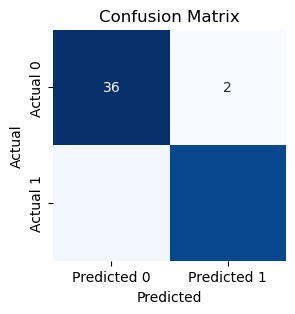

In [29]:
 plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt = 'd', cmap='Blues', cbar = False, 
           xticklabels = ['Predicted 0','Predicted 1'],
           yticklabels = ['Actual 0','Actual 1'])
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [25]:
#Sensitivity (recall), Specificity, Accuracy
from sklearn.metrics import accuracy_score, recall_score, precision_score
sensitivity = recall_score(y_pred_df['actual_Y'],y_pred_df['predicted_Y'])
accuracy = accuracy_score(y_pred_df['actual_Y'],y_pred_df['predicted_Y'])
print(f"Sensitivity (Recall): {sensitivity:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Sensitivity (Recall): 0.92
Accuracy: 0.93


In [26]:
from sklearn.metrics import confusion_matrix, classification_report
print("\nClassificiation report: ")
print(classification_report(y_pred_df['actual_Y'],y_pred_df['predicted_Y']))


Classificiation report: 
              precision    recall  f1-score   support

           0       0.92      0.95      0.94        38
           1       0.94      0.92      0.93        36

    accuracy                           0.93        74
   macro avg       0.93      0.93      0.93        74
weighted avg       0.93      0.93      0.93        74



#### Implications/Recommendations
#### 93% Accuracy
#### 92% sensitivity
#### 95% specificity
#### 92% credit reating -> Accept the model at this threshold of 0.5


## CLass 1 => performance is high - is a good model
## Higher Sensitivity is recommended

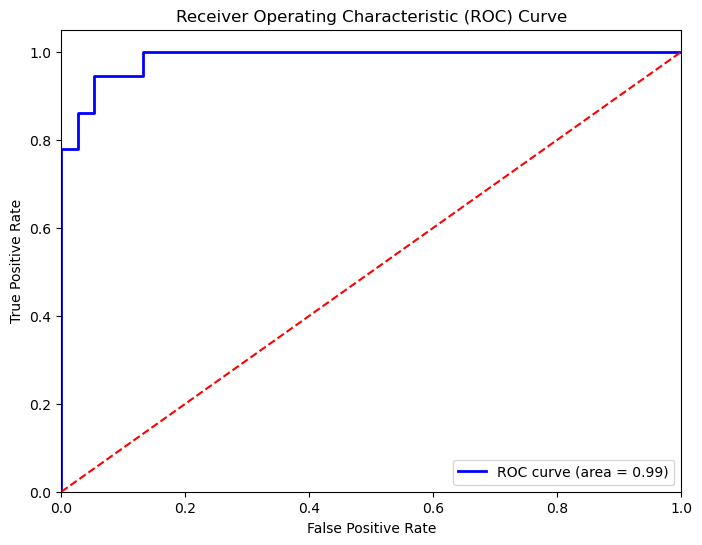

In [27]:
# Plot ROC curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_pred_df['actual_Y'], y_pred_df['predicted_prob'])
roc_auc = auc(fpr, tpr)
# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [29]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

def compute_sensitivity_table(y_actual, y_prob, specific_thresholds=np.arange(0.1, 0.5, 0.01)):
    """
    This function computes and prints a table of sensitivity (TPR) values for specified thresholds (0.1 to 0.5).
    
    Parameters:
    y_actual: array-like
        The actual binary labels.
    y_prob: array-like
        The predicted probabilities for the positive class.
    specific_thresholds: array-like, optional
        The specific thresholds for which to compute sensitivity. Default is np.arange(0.1, 0.5, 0.01).
    """
    
    results = []  # List to store results for the table

    for threshold in specific_thresholds:
        # Convert predicted probabilities to binary predictions based on the threshold
        y_pred = (y_prob >= threshold).astype(int)
        
        # Get the confusion matrix
        tn, fp, fn, tp = confusion_matrix(y_actual, y_pred).ravel()
        
        # Calculate TPR (Sensitivity)
        tpr = tp / (tp + fn) if (tp + fn) > 0 else 0  # Avoid division by zero
        
        # Append results
        results.append({'Threshold': threshold, 'Sensitivity (TPR)': tpr})

    # Create a DataFrame for better formatting
    sensitivity_table = pd.DataFrame(results)
    
    # Print the sensitivity table
    print(sensitivity_table)

In [30]:
compute_sensitivity_table(y_pred_df['actual_Y'], y_pred_df['predicted_prob'])

    Threshold  Sensitivity (TPR)
0        0.10           1.000000
1        0.11           1.000000
2        0.12           1.000000
3        0.13           1.000000
4        0.14           1.000000
5        0.15           1.000000
6        0.16           0.972222
7        0.17           0.972222
8        0.18           0.972222
9        0.19           0.972222
10       0.20           0.972222
11       0.21           0.972222
12       0.22           0.972222
13       0.23           0.944444
14       0.24           0.944444
15       0.25           0.944444
16       0.26           0.944444
17       0.27           0.944444
18       0.28           0.944444
19       0.29           0.944444
20       0.30           0.944444
21       0.31           0.944444
22       0.32           0.944444
23       0.33           0.944444
24       0.34           0.944444
25       0.35           0.944444
26       0.36           0.944444
27       0.37           0.916667
28       0.38           0.916667
29       0

In [31]:
## here we for a higher sensitivity we need to choose a cut-off/threshold of 0.16 this can be seen from the above table